#                                    Necessary Libraries 


In [1]:
#  Necessary Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cross_validation import train_test_split  
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score, StratifiedKFold, KFold
from sklearn.pipeline import make_pipeline
from IPython.display import Image 
from sklearn.preprocessing import StandardScaler

/Users/Jordan/miniconda2/envs/goshawk/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/Jordan/miniconda2/envs/goshawk/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:

#  Initial read in
spine = pd.read_csv('/Users/Jordan/GitHub/DataResources/Dataset_spine.csv',index_col = False ,header =None, names =['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle','sacral_slope', 'pelvic_radius',
'degree_spondylolisthesis','pelvic_slope','direct_tilt','thoracic_slope','cervical_tilt','sacrum_angle',
'scoliosis_slope', 'class'])

#  working copy
spine2 = spine.copy()
spine2 = spine2.drop(0,axis =0 )

# Encoded for classification


In [3]:

le = {'Abnormal': 1, 'Normal': 0}
spine2['class'] = spine2['class'].map(le)
features = [c for c in spine2.columns if c != 'class']
spine2.info()
spine2.apply(lambda x: pd.to_numeric(x, errors='ignore'))


<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 1 to 310
Data columns (total 13 columns):
pelvic_incidence            310 non-null object
pelvic_tilt                 310 non-null object
lumbar_lordosis_angle       310 non-null object
sacral_slope                310 non-null object
pelvic_radius               310 non-null object
degree_spondylolisthesis    310 non-null object
pelvic_slope                310 non-null object
direct_tilt                 310 non-null object
thoracic_slope              310 non-null object
cervical_tilt               310 non-null object
sacrum_angle                310 non-null object
scoliosis_slope             310 non-null object
class                       310 non-null int64
dtypes: int64(1), object(12)
memory usage: 33.9+ KB


,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,class
1,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,1
2,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,1
3,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,1
4,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,1
5,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,1
6,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,0.789993,29.3230,12.0036,10.40462,-1.512209,9.6548,1
7,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,0.198920,13.8514,10.7146,11.37832,-20.510434,25.9477,1
8,45.366754,10.755611,29.038349,34.611142,117.270068,-10.675871,0.131973,28.8165,7.7676,7.60961,-25.111459,26.3543,1
9,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,0.190408,22.7085,11.4234,10.59188,-20.020075,40.0276,1
10,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,0.367700,26.2011,8.7380,14.91416,-1.702097,21.4320,1


In [4]:
spine2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 1 to 310
Data columns (total 13 columns):
pelvic_incidence            310 non-null object
pelvic_tilt                 310 non-null object
lumbar_lordosis_angle       310 non-null object
sacral_slope                310 non-null object
pelvic_radius               310 non-null object
degree_spondylolisthesis    310 non-null object
pelvic_slope                310 non-null object
direct_tilt                 310 non-null object
thoracic_slope              310 non-null object
cervical_tilt               310 non-null object
sacrum_angle                310 non-null object
scoliosis_slope             310 non-null object
class                       310 non-null int64
dtypes: int64(1), object(12)
memory usage: 33.9+ KB


# Spine data information 

In [5]:
from sklearn import preprocessing

# Grouped Variables 

y = spine2['class']
X = spine2[features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)


# Scaled

Xs = preprocessing.scale(X)
ys =y
Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs, ys, test_size=0.3, random_state = 42)
                                                        


# Evaluation functions 


In [6]:
# f(x) to evaluate each mode


def evaluate_model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    a = accuracy_score(y_test, y_pred)
    
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)

    print model
    print cm
    print cr
    
    return a


# scaled
def evaluate_model_s(model):
    model.fit(Xs_train, ys_train)
    ys_pred = model.predict(Xs_test)
    
    a = accuracy_score(ys_test, ys_pred)
    cm = confusion_matrix(ys_test, ys_pred)
    cr = classification_report(ys_test, ys_pred)
    print model
    print cm
    print cr
    return a 


all_models = {}

In [7]:

#  KNN Classifer
knn_mod = evaluate_model(KNeighborsClassifier())
knn_mod_s= evaluate_model_s(KNeighborsClassifier())

print knn_mod
print knn_mod_s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
[[17  7]
 [ 9 60]]
             precision    recall  f1-score   support

          0       0.65      0.71      0.68        24
          1       0.90      0.87      0.88        69

avg / total       0.83      0.83      0.83        93

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
[[18  6]
 [13 56]]
             precision    recall  f1-score   support

          0       0.58      0.75      0.65        24
          1       0.90      0.81      0.85        69

avg / total       0.82      0.80      0.80        93

0.827956989247
0.795698924731


In [8]:
#  Model Evaulation with KNN, best parameters found with grid search
params = {'n_neighbors': range(2,60)}

gsknn = GridSearchCV(KNeighborsClassifier(),
                     params, n_jobs=-1,
                     cv=KFold(len(y), n_folds=3, shuffle=True))

# normal 
gsknn.fit(X, y)
a1 = gsknn.best_params_
gsknn_mod = gsknn.best_score_
a =evaluate_model(gsknn.best_estimator_)



# scaled
gsknn.fit(Xs,ys)
a2= gsknn.best_params_
gsknn_s_mod = gsknn.best_score_
b1 = evaluate_model_s(gsknn.best_estimator_)
print "scaled" ,b1
print "not scaled" ,a
# GridSearch 
all_models['gsknn'] = {'model': gsknn.best_estimator_,
                     'score': a}
# GridSearch Scaled
all_models['gsknn_s'] = {'model': gsknn.best_estimator_,
                     'score': b1}

# KNN
all_models['knn'] = {'model': KNeighborsClassifier(),
                     'score': knn_mod}
# KNN scaled
all_models['knn_s'] = {'model': KNeighborsClassifier(),
                     'score': knn_mod_s}



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=22, p=2,
           weights='uniform')
[[21  3]
 [13 56]]
             precision    recall  f1-score   support

          0       0.62      0.88      0.72        24
          1       0.95      0.81      0.87        69

avg / total       0.86      0.83      0.84        93

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=18, p=2,
           weights='uniform')
[[20  4]
 [14 55]]
             precision    recall  f1-score   support

          0       0.59      0.83      0.69        24
          1       0.93      0.80      0.86        69

avg / total       0.84      0.81      0.82        93

scaled 0.806451612903
not scaled 0.827956989247


In [9]:
# Bagging KNN 

baggingknn = BaggingClassifier(KNeighborsClassifier())

print 'bagging knn' ,evaluate_model(baggingknn)


bagging knn BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)
[[19  5]
 [ 9 60]]
             precision    recall  f1-score   support

          0       0.68      0.79      0.73        24
          1       0.92      0.87      0.90        69

avg / total       0.86      0.85      0.85        93

0.849462365591


In [10]:
# Grid Searched bagged knn for best parameters

bagging_params = {'n_estimators': [10, 20],
                  'max_samples': [0.7, 1.0],
                  'max_features': [0.7, 1.0],
                  'bootstrap_features': [True, False]}


gsbaggingknn = GridSearchCV(baggingknn,
                            bagging_params, n_jobs=-1,
                            cv=KFold(len(y), n_folds=3, shuffle=True))

In [11]:
gsbaggingknn.fit(X,y)
gsbaggingknn.best_params_

all_models['gsbaggingknn'] = {'model': gsbaggingknn.best_estimator_,
                              'score': evaluate_model(gsbaggingknn.best_estimator_)}



BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=20, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)
[[17  7]
 [10 59]]
             precision    recall  f1-score   support

          0       0.63      0.71      0.67        24
          1       0.89      0.86      0.87        69

avg / total       0.83      0.82      0.82        93



In [12]:
lr = LogisticRegression()
a= evaluate_model(lr)
b = evaluate_model_s(lr)
all_models['lr'] = {'model': lr,
                    'score': evaluate_model(lr)}
all_models['lr_s'] = {'model': lr,
                    'score': evaluate_model_s(lr)}
print "not scaled",a
print "scaled" ,b

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
[[19  5]
 [ 8 61]]
             precision    recall  f1-score   support

          0       0.70      0.79      0.75        24
          1       0.92      0.88      0.90        69

avg / total       0.87      0.86      0.86        93

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
[[20  4]
 [ 5 64]]
             precision    recall  f1-score   support

          0       0.80      0.83      0.82        24
          1       0.94      0.93      0.93        69

avg / total       0.90      0.90      0.90        93

Lo

In [13]:
params = {'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
          'penalty': ['l1', 'l2']}

gslr = GridSearchCV(lr,
                    params, n_jobs=-1,
                    cv=KFold(len(y), n_folds=3, shuffle=True))
# not scaled 
gslr.fit(X, y)
print gslr.best_params_
print gslr.best_score_

all_models['gslr'] = {'model': gslr.best_estimator_,
                             'score': evaluate_model(gslr.best_estimator_)}

{'penalty': 'l1', 'C': 10.0}
0.848387096774
LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
[[18  6]
 [ 6 63]]
             precision    recall  f1-score   support

          0       0.75      0.75      0.75        24
          1       0.91      0.91      0.91        69

avg / total       0.87      0.87      0.87        93



In [14]:
# scaled
gslr.fit(Xs, y)
print gslr.best_params_
print gslr.best_score_


all_models['gslr_s'] = {'model': lr,
                    'score': evaluate_model_s(gslr.best_estimator_)}


{'penalty': 'l2', 'C': 10.0}
0.854838709677
LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
[[18  6]
 [ 4 65]]
             precision    recall  f1-score   support

          0       0.82      0.75      0.78        24
          1       0.92      0.94      0.93        69

avg / total       0.89      0.89      0.89        93



In [15]:

gsbagginglr = GridSearchCV(BaggingClassifier(gslr.best_estimator_),
                           bagging_params, n_jobs=-1,
                           cv=KFold(len(y), n_folds=3, shuffle=True))

gsbagginglr.fit(X, y)

print gsbagginglr.best_params_
print gsbagginglr.best_score_

all_models['gsbagginglr'] = {'model': gsbagginglr.best_estimator_,
                             'score': evaluate_model(gsbagginglr.best_estimator_)}

all_models['gsbagginglr'] = {'model': gsbagginglr.best_estimator_,
                             'score': evaluate_model_s(gsbagginglr.best_estimator_)}

{'max_features': 1.0, 'max_samples': 0.7, 'n_estimators': 20, 'bootstrap_features': False}
0.845161290323
BaggingClassifier(base_estimator=LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=0.7, n_estimators=20, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)
[[19  5]
 [ 8 61]]
             precision    recall  f1-score   support

          0       0.70      0.79      0.75        24
          1       0.92      0.88      0.90        69

avg / total       0.87      0.86      0.86        93

BaggingClassifier(base_estimator=LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_cl

In [16]:
dt = DecisionTreeClassifier()
evaluate_model(dt)

all_models['dt'] = {'model': dt,
                    'score': evaluate_model(dt)}
all_models['dt_s'] = {'model': dt,
                             'score': evaluate_model_s(dt)}

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
[[13 11]
 [10 59]]
             precision    recall  f1-score   support

          0       0.57      0.54      0.55        24
          1       0.84      0.86      0.85        69

avg / total       0.77      0.77      0.77        93

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
[[13 11]
 [10 59]]
             precision    recall  f1-score   support

          0       0.57      0.54      0.55        24
          1     

In [17]:
params = {'criterion': ['gini', 'entropy'],
          'splitter': ['best', 'random'],
          'max_depth': [None, 5, 10],
          'min_samples_split': [2, 5],
          'min_samples_leaf': [1, 2, 3]}

gsdt = GridSearchCV(dt,
                    params, n_jobs=-1,
                    cv=KFold(len(y), n_folds=3, shuffle=True))

gsdt.fit(X, y)
print gsdt.best_params_
print gsdt.best_score_

all_models['gsdt'] = {'model': gsdt.best_estimator_,
                      'score': evaluate_model(gsdt.best_estimator_)}

{'min_samples_split': 2, 'splitter': 'best', 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 3}
0.825806451613
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=3,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
[[12 12]
 [ 8 61]]
             precision    recall  f1-score   support

          0       0.60      0.50      0.55        24
          1       0.84      0.88      0.86        69

avg / total       0.77      0.78      0.78        93



In [18]:
gsdt.fit(Xs, y)
print gsdt.best_params_
print gsdt.best_score_

all_models['gsdt_s'] = {'model': gsdt.best_estimator_,
                      'score': evaluate_model_s(gsdt.best_estimator_)}

{'min_samples_split': 5, 'splitter': 'best', 'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 3}
0.832258064516
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=3,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
[[13 11]
 [12 57]]
             precision    recall  f1-score   support

          0       0.52      0.54      0.53        24
          1       0.84      0.83      0.83        69

avg / total       0.76      0.75      0.75        93



,score
model,
lr_s,0.903226
gslr_s,0.892473
gslr,0.870968
gsbagginglr,0.870968
lr,0.860215
knn,0.827957
gsknn,0.827957
gsbaggingknn,0.817204
gsknn_s,0.806452


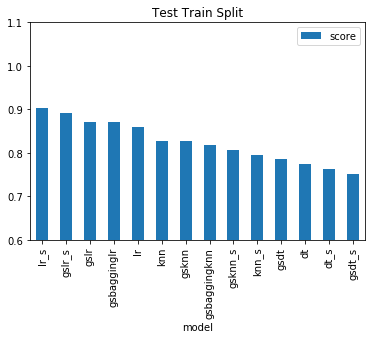

In [19]:

scores = pd.DataFrame([(k, v['score']) for k, v in all_models.iteritems()],
             columns=['model', 'score']).set_index('model').sort_values('score', ascending=False)


scores.plot(kind='bar')
plt.title("Test Train Split")
plt.ylim(0.6, 1.1)

scores

gsknn_s knn gsdt_s gsknn gslr_s gslr gsdt knn_s dt_s lr gsbaggingknn gsbagginglr lr_s dt

,score,error
model,,
gsbagginglr,0.858041,0.005193
knn_s,0.845283,0.030950
gslr,0.845158,0.031716
gslr_s,0.832151,0.023500
gsbaggingknn,0.829039,0.019874
lr,0.822598,0.016290
gsknn_s,0.819548,0.042564
lr_s,0.816094,0.008622
knn,0.809497,0.044209


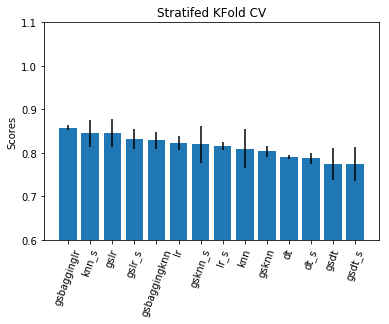

In [20]:
def retest(model):
    scores = cross_val_score(model, X, y,
                             cv=StratifiedKFold(y, shuffle=True),
                             n_jobs=-1)
    m = scores.mean()
    s = scores.std()
    
    return m, s

for k, v in all_models.iteritems():
    cvres = retest(v['model'])
    print k, 
    all_models[k]['cvres'] = cvres
    
cvscores = pd.DataFrame([(k, v['cvres'][0], v['cvres'][1] ) for k, v in all_models.iteritems()],
                        columns=['model', 'score', 'error']).set_index('model').sort_values('score', ascending=False)



fig, ax = plt.subplots()
rects1 = ax.bar(range(len(cvscores)), cvscores.score,
                yerr=cvscores.error,
                tick_label=cvscores.index)
plt.title("Stratifed KFold CV")
ax.set_ylabel('Scores')
plt.xticks(rotation=70)
plt.ylim(0.6, 1.1)

cvscores
